In [10]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


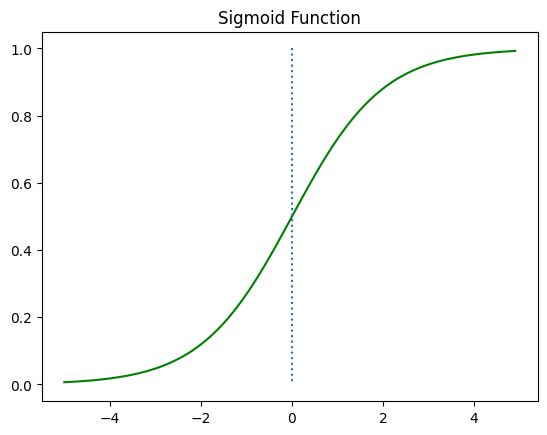

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


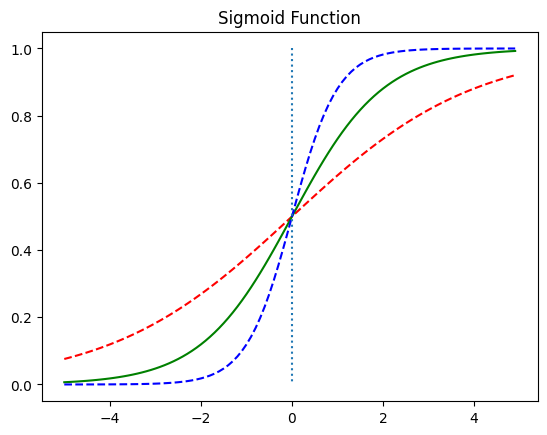

In [26]:
#경사변화
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


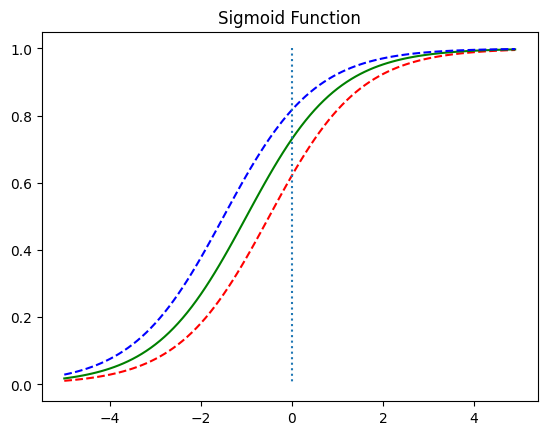

In [25]:
#+:좌우이동
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


cost(w,b)=1/n(sigma[y-H(x)]**2)  -->H(x)=sigmoid(wx+b):가설
이를 전체 함수에 걸쳐 최소값인 글로벌 미니멈(Global Minimum)이 아닌 특정 구역에서의 최소값인 로컬 미니멈(Local Minimum)에 도달했다고 합니다. 이는 cost가 최소가 되는 가중치를 찾는다는 비용 함수의 목적에 맞지 않습니다.

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
print(x_train.shape)
print(y_train.shape)
w=torch.zeros((2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

#hypoth=1/(1+torch.exp(-(x_train.matmul(w)+b)))
hypoth=torch.sigmoid(x_train.matmul(w)+b)
print(hyper)
print(y_train)

torch.Size([6, 2])
torch.Size([6, 1])
tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [42]:
losses=-(y_train * torch.log(hypoth) + 
  (1 - y_train) * torch.log(1 - hypoth))
print(losses)
cost=losses.mean()
print(cost)

F.binary_cross_entropy(hypoth,y_train)


tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)
tensor(0.6931, grad_fn=<MeanBackward0>)


tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [54]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
w = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

opt=torch.optim.SGD([w,b],lr=0.01)
nb_epochs=20000
for epoch in range(nb_epochs+1):
    hypoth=torch.sigmoid(x_train.matmul(w)+b)
    cost=-(y_train*torch.log(hypoth)+(1-y_train)*torch.log(hypoth)).mean()
    
    
    opt.zero_grad()
    cost.backward()
    opt.step()
    
    
    if epoch % 100==0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))    

Epoch    0/20000 Cost: 0.693147
Epoch  100/20000 Cost: 0.085417
Epoch  200/20000 Cost: 0.048933
Epoch  300/20000 Cost: 0.034967
Epoch  400/20000 Cost: 0.027429
Epoch  500/20000 Cost: 0.022664
Epoch  600/20000 Cost: 0.019362
Epoch  700/20000 Cost: 0.016930
Epoch  800/20000 Cost: 0.015059
Epoch  900/20000 Cost: 0.013574
Epoch 1000/20000 Cost: 0.012364
Epoch 1100/20000 Cost: 0.011359
Epoch 1200/20000 Cost: 0.010509
Epoch 1300/20000 Cost: 0.009782
Epoch 1400/20000 Cost: 0.009151
Epoch 1500/20000 Cost: 0.008599
Epoch 1600/20000 Cost: 0.008112
Epoch 1700/20000 Cost: 0.007678
Epoch 1800/20000 Cost: 0.007290
Epoch 1900/20000 Cost: 0.006940
Epoch 2000/20000 Cost: 0.006623
Epoch 2100/20000 Cost: 0.006334
Epoch 2200/20000 Cost: 0.006070
Epoch 2300/20000 Cost: 0.005828
Epoch 2400/20000 Cost: 0.005604
Epoch 2500/20000 Cost: 0.005398
Epoch 2600/20000 Cost: 0.005207
Epoch 2700/20000 Cost: 0.005029
Epoch 2800/20000 Cost: 0.004863
Epoch 2900/20000 Cost: 0.004708
Epoch 3000/20000 Cost: 0.004563
Epoch 31

In [57]:
hypoth=torch.sigmoid(x_train.matmul(w)+b)
print(hypoth)
predict=hypoth>=torch.FloatTensor([0.5])
print(predict)
print(w)
print(b)


tensor([[0.9964],
        [0.9999],
        [0.9992],
        [1.0000],
        [1.0000],
        [1.0000]], grad_fn=<SigmoidBackward0>)
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])
tensor([[1.5675],
        [1.6188]], requires_grad=True)
tensor([0.8218], requires_grad=True)


In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model=nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

model(x_train)
opt=torch.optim.SGD(model.parameters(),lr=0.01)
nb_epochs=20000

for epoch in range(nb_epochs+1):
    hypoth=model(x_train)
    cost=F.binary_cross_entropy(hypoth,y_train)
    
    opt.zero_grad()
    cost.backward()
    opt.step()

    if epoch %100==0:
        predict=hypoth>=torch.FloatTensor([0.5])
        correct=predict.float()==y_train
        accuracy=correct.sum().item()/len(correct)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))        
model(x_train)
print(list(model.parameters()))

Epoch    0/20000 Cost: 0.539713 Accuracy 83.33%
Epoch  100/20000 Cost: 0.511077 Accuracy 83.33%
Epoch  200/20000 Cost: 0.491104 Accuracy 83.33%
Epoch  300/20000 Cost: 0.475294 Accuracy 83.33%
Epoch  400/20000 Cost: 0.462182 Accuracy 83.33%
Epoch  500/20000 Cost: 0.450881 Accuracy 83.33%
Epoch  600/20000 Cost: 0.440840 Accuracy 83.33%
Epoch  700/20000 Cost: 0.431705 Accuracy 83.33%
Epoch  800/20000 Cost: 0.423246 Accuracy 83.33%
Epoch  900/20000 Cost: 0.415307 Accuracy 83.33%
Epoch 1000/20000 Cost: 0.407780 Accuracy 83.33%
Epoch 1100/20000 Cost: 0.400593 Accuracy 83.33%
Epoch 1200/20000 Cost: 0.393691 Accuracy 83.33%
Epoch 1300/20000 Cost: 0.387038 Accuracy 83.33%
Epoch 1400/20000 Cost: 0.380605 Accuracy 83.33%
Epoch 1500/20000 Cost: 0.374370 Accuracy 83.33%
Epoch 1600/20000 Cost: 0.368319 Accuracy 83.33%
Epoch 1700/20000 Cost: 0.362437 Accuracy 83.33%
Epoch 1800/20000 Cost: 0.356717 Accuracy 83.33%
Epoch 1900/20000 Cost: 0.351148 Accuracy 83.33%
Epoch 2000/20000 Cost: 0.345724 Accuracy

In [68]:
class BinaryClassify(nn.Module):
    def __init__(self):
        super().__init__(self)
        self.linear(2,1)
        self.sigmoid=nn.Sigmoid()

    def forward(self,x):
        return self.sigmoid(self.linear(x))

In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt

torch.manual_seed(1)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
class BC(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(2,1)
        self.sigmoid=nn.Sigmoid()
        
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))

model=BC()

opt=opt.SGD(model.parameters(),lr=1)
nb_epochs=20000
for epoch in range(nb_epochs+1):
    hypoth=model(x_train)
    cost=F.binary_cross_entropy(hypoth,y_train)

    opt.zero_grad()
    cost.backward()
    opt.step()

    if epoch % 100==0:
        predict=hypoth>=torch.FloatTensor([0.5])
        correct=predict.float()==y_train
        accuracy=correct.sum().item()/len(correct)

        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/20000 Cost: 0.539713 Accuracy 83.33%
Epoch  100/20000 Cost: 0.134272 Accuracy 100.00%
Epoch  200/20000 Cost: 0.080486 Accuracy 100.00%
Epoch  300/20000 Cost: 0.057820 Accuracy 100.00%
Epoch  400/20000 Cost: 0.045251 Accuracy 100.00%
Epoch  500/20000 Cost: 0.037228 Accuracy 100.00%
Epoch  600/20000 Cost: 0.031649 Accuracy 100.00%
Epoch  700/20000 Cost: 0.027538 Accuracy 100.00%
Epoch  800/20000 Cost: 0.024381 Accuracy 100.00%
Epoch  900/20000 Cost: 0.021877 Accuracy 100.00%
Epoch 1000/20000 Cost: 0.019843 Accuracy 100.00%
Epoch 1100/20000 Cost: 0.018157 Accuracy 100.00%
Epoch 1200/20000 Cost: 0.016736 Accuracy 100.00%
Epoch 1300/20000 Cost: 0.015523 Accuracy 100.00%
Epoch 1400/20000 Cost: 0.014474 Accuracy 100.00%
Epoch 1500/20000 Cost: 0.013558 Accuracy 100.00%
Epoch 1600/20000 Cost: 0.012752 Accuracy 100.00%
Epoch 1700/20000 Cost: 0.012036 Accuracy 100.00%
Epoch 1800/20000 Cost: 0.011397 Accuracy 100.00%
Epoch 1900/20000 Cost: 0.010822 Accuracy 100.00%
Epoch 2000/20000 Cost

1. 로지스틱 회귀
로지스틱 회귀에서 시그모이드 함수는 예측값을 0과 1 사이의 값으로 만듭니다. 예를 들어 스팸 메일 분류기를 로지스틱 회귀로 구현하였을 때, 출력이 0.75이라면 이는 이메일이 스팸일 확률이 75%라는 의미가 됩니다. 반대로, 스팸 메일이 아닐 확률은 25%가 됩니다. 이 두 확률의 총 합은 1입니다.

2. 소프트맥스 회귀
소프트맥스 회귀는 확률의 총 합이 1이 되는 이 아이디어를 다중 클래스 분류 문제에 적용합니다. 소프트맥스 회귀는 각 클래스. 즉, 각 선택지마다 소수 확률을 할당합니다. 이때 총 확률의 합은 1이 되어야 합니다. 이렇게 되면 각 선택지가 정답일 확률로 표현됩니다.
결국 소프트맥스 회귀는 선택지의 개수만큼의 차원을 가지는 벡터를 만들고, 해당 벡터가 벡터의 모든 원소의 합이 1이 되도록 원소들의 값을 변환시키는 어떤 함수를 지나게 만들어야 합니다. 위의 그림은 붓꽃 품종 분류하기 문제 등과 같이 선택지의 개수가 3개일때, 3차원 벡터가 어떤 함수 ?를 지나 원소의 총 합이 1이 되도록 원소들의 값이 변환되는 모습을 보여줍니다. 뒤에서 배우겠지만, 이 함수를 소프트맥스(softmax) 함수라고 합니다.

softmax(z)=[e**z(n)/sigma(e**z(각각))]

In [101]:
import torch
import torch.nn.functional as F

torch.manual_seed(5)

z=torch.FloatTensor([1,2,3])
hypoth=F.softmax(z,dim=0)
print(hypoth)
hypoth.sum()

z=torch.rand(5,5,requires_grad=True)
hypoth=F.softmax(z,dim=0)
print(hypoth)

y=torch.randint(5,(5,)).long()
print(y)

tensor([0.0900, 0.2447, 0.6652])
tensor([[0.2552, 0.1411, 0.2881, 0.2675, 0.2021],
        [0.1250, 0.1466, 0.2431, 0.1218, 0.2176],
        [0.2040, 0.2188, 0.1250, 0.2278, 0.1646],
        [0.1985, 0.3318, 0.2227, 0.1247, 0.2021],
        [0.2173, 0.1616, 0.1211, 0.2583, 0.2135]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1, 4, 3, 1])


In [119]:
y_one_hot=torch.zeros_like(hypoth)
y_one_hot.scatter_(1,y.unsqueeze(1),1)
print(y.unsqueeze(1))
print(y_one_hot)
cost=(y_one_hot*-torch.log(hypoth)).sum(dim=1).mean()
print(cost)

tensor([[2],
        [1],
        [4],
        [3],
        [1]])
tensor([[0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.]])
tensor(1.7746, grad_fn=<MeanBackward0>)


In [120]:
torch.log(F.softmax(z,dim=1))

tensor([[-1.5387, -2.2428, -1.4615, -1.5490, -1.4489],
        [-1.9790, -1.9312, -1.3577, -2.0623, -1.1014],
        [-1.5506, -1.5925, -2.0846, -1.4977, -1.4420],
        [-1.7168, -1.3152, -1.6460, -2.2395, -1.3760],
        [-1.5427, -1.9510, -2.1718, -1.4274, -1.2373]], grad_fn=<LogBackward0>)

In [126]:
q=(y_one_hot*-torch.log(F.softmax(z,dim=1))).sum(dim=1).mean()
w=(y_one_hot*-F.log_softmax(z,dim=1)).sum(dim=1).mean()
print(q)
print(w)
#더 간단히
print(F.nll_loss(F.log_softmax(z,dim=1),y))
#여기서 nll이란 Negative Log Likelihood의 약자입니다.
#위에서 nll_loss는 F.log_softmax()를 수행한 후에 남은 수식들을 수행합니다.
#이를 더 간단하게 하면 다음과 같이 사용할 수 있습니다.
#F.cross_entropy()는 F.log_softmax()와 F.nll_loss()를 포함하고 있습니다.
F.cross_entropy(z,y)

tensor(1.8050, grad_fn=<MeanBackward0>)
tensor(1.8050, grad_fn=<MeanBackward0>)
tensor(1.8050, grad_fn=<NllLossBackward0>)


tensor(1.8050, grad_fn=<NllLossBackward0>)

In [168]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt

torch.manual_seed(1)
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [169]:

y_one_hot=torch.zeros(8,3)
y_one_hot.scatter_(1,y_train.unsqueeze(1),1)
print(y_one_hot.shape)

w=torch.zeros((4,3),requires_grad=True)
b=torch.zeros((1,3),requires_grad=True)

opt=opt.SGD([w,b],lr=1)

nb_epochs=20000
for epoch in range(nb_epochs+1):
    hypoth=F.softmax(x_train.matmul(w)+b,dim=1)
    cost=(y_one_hot*-torch.log(hypoth)).sum(dim=1).mean()
    opt.zero_grad()
    opt.step()
    cost.backward()

    if epoch %100==0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))        

torch.Size([8, 3])
Epoch    0/20000 Cost: 1.098612
Epoch  100/20000 Cost: 1.098612
Epoch  200/20000 Cost: 1.098612
Epoch  300/20000 Cost: 1.098612
Epoch  400/20000 Cost: 1.098612
Epoch  500/20000 Cost: 1.098612
Epoch  600/20000 Cost: 1.098612
Epoch  700/20000 Cost: 1.098612
Epoch  800/20000 Cost: 1.098612
Epoch  900/20000 Cost: 1.098612
Epoch 1000/20000 Cost: 1.098612
Epoch 1100/20000 Cost: 1.098612
Epoch 1200/20000 Cost: 1.098612
Epoch 1300/20000 Cost: 1.098612
Epoch 1400/20000 Cost: 1.098612
Epoch 1500/20000 Cost: 1.098612
Epoch 1600/20000 Cost: 1.098612
Epoch 1700/20000 Cost: 1.098612
Epoch 1800/20000 Cost: 1.098612
Epoch 1900/20000 Cost: 1.098612
Epoch 2000/20000 Cost: 1.098612
Epoch 2100/20000 Cost: 1.098612
Epoch 2200/20000 Cost: 1.098612
Epoch 2300/20000 Cost: 1.098612
Epoch 2400/20000 Cost: 1.098612
Epoch 2500/20000 Cost: 1.098612
Epoch 2600/20000 Cost: 1.098612
Epoch 2700/20000 Cost: 1.098612
Epoch 2800/20000 Cost: 1.098612
Epoch 2900/20000 Cost: 1.098612
Epoch 3000/20000 Cost

In [171]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
y_one_hot=torch.zeros(8,3)
y_one_hot.scatter_(1,y_train.unsqueeze(1),1)
print(y_one_hot.shape)
w = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)
opt=opt.SGD([w,b],lr=0.01)


nb_epochs=20000
for epoch in range(nb_epochs+1):
    z=x_train.matmul(w)+b
    cost=F.cross_entropy(z,y_train)
    opt.zero_grad()
    cost.backward()
    opt.step()

    if epoch % 100==0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))       

torch.Size([8, 3])
Epoch    0/20000 Cost: 1.098612
Epoch  100/20000 Cost: 0.825978
Epoch  200/20000 Cost: 0.745367
Epoch  300/20000 Cost: 0.695094
Epoch  400/20000 Cost: 0.658135
Epoch  500/20000 Cost: 0.629088
Epoch  600/20000 Cost: 0.605386
Epoch  700/20000 Cost: 0.585531
Epoch  800/20000 Cost: 0.568553
Epoch  900/20000 Cost: 0.553787
Epoch 1000/20000 Cost: 0.540759
Epoch 1100/20000 Cost: 0.529122
Epoch 1200/20000 Cost: 0.518616
Epoch 1300/20000 Cost: 0.509045
Epoch 1400/20000 Cost: 0.500253
Epoch 1500/20000 Cost: 0.492121
Epoch 1600/20000 Cost: 0.484553
Epoch 1700/20000 Cost: 0.477470
Epoch 1800/20000 Cost: 0.470809
Epoch 1900/20000 Cost: 0.464518
Epoch 2000/20000 Cost: 0.458554
Epoch 2100/20000 Cost: 0.452880
Epoch 2200/20000 Cost: 0.447465
Epoch 2300/20000 Cost: 0.442282
Epoch 2400/20000 Cost: 0.437310
Epoch 2500/20000 Cost: 0.432529
Epoch 2600/20000 Cost: 0.427922
Epoch 2700/20000 Cost: 0.423474
Epoch 2800/20000 Cost: 0.419173
Epoch 2900/20000 Cost: 0.415007
Epoch 3000/20000 Cost

In [221]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
model=nn.Linear(4,3)
opt=opt.SGD(model.parameters(),lr=0.1)
epochs=20000
for epoch in range(epochs+1):
    predict=model(x_train)
    cost=F.cross_entropy(predict,y_train)

    opt.zero_grad()
    opt.step()
    cost.backward()

    if epoch % 100==0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))        

Epoch    0/20000 Cost: 4.937746
Epoch  100/20000 Cost: 4.937746
Epoch  200/20000 Cost: 4.937746
Epoch  300/20000 Cost: 4.937746
Epoch  400/20000 Cost: 4.937746
Epoch  500/20000 Cost: 4.937746
Epoch  600/20000 Cost: 4.937746
Epoch  700/20000 Cost: 4.937746
Epoch  800/20000 Cost: 4.937746
Epoch  900/20000 Cost: 4.937746
Epoch 1000/20000 Cost: 4.937746
Epoch 1100/20000 Cost: 4.937746
Epoch 1200/20000 Cost: 4.937746
Epoch 1300/20000 Cost: 4.937746
Epoch 1400/20000 Cost: 4.937746
Epoch 1500/20000 Cost: 4.937746
Epoch 1600/20000 Cost: 4.937746
Epoch 1700/20000 Cost: 4.937746
Epoch 1800/20000 Cost: 4.937746
Epoch 1900/20000 Cost: 4.937746
Epoch 2000/20000 Cost: 4.937746
Epoch 2100/20000 Cost: 4.937746
Epoch 2200/20000 Cost: 4.937746
Epoch 2300/20000 Cost: 4.937746
Epoch 2400/20000 Cost: 4.937746
Epoch 2500/20000 Cost: 4.937746
Epoch 2600/20000 Cost: 4.937746
Epoch 2700/20000 Cost: 4.937746
Epoch 2800/20000 Cost: 4.937746
Epoch 2900/20000 Cost: 4.937746
Epoch 3000/20000 Cost: 4.937746
Epoch 31

In [222]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
torch.manual_seed(1)
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)


class SM(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(4,3)
    def forward(self, x):
        return self.linear(x)

model=SM()
opt=opt.SGD(model.parameters(),lr=0.1)
epochs=20000

for epoch in range(epochs+1):
    predict=model(x_train)
    cost=F.cross_entropy(predict,y_train)
    opt.zero_grad()
    cost.backward()
    opt.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/20000 Cost: 1.616785
Epoch  100/20000 Cost: 0.658891
Epoch  200/20000 Cost: 0.573443
Epoch  300/20000 Cost: 0.518151
Epoch  400/20000 Cost: 0.473265
Epoch  500/20000 Cost: 0.433516
Epoch  600/20000 Cost: 0.396563
Epoch  700/20000 Cost: 0.360914
Epoch  800/20000 Cost: 0.325392
Epoch  900/20000 Cost: 0.289178
Epoch 1000/20000 Cost: 0.254148
Epoch 1100/20000 Cost: 0.234973
Epoch 1200/20000 Cost: 0.223493
Epoch 1300/20000 Cost: 0.213053
Epoch 1400/20000 Cost: 0.203509
Epoch 1500/20000 Cost: 0.194751
Epoch 1600/20000 Cost: 0.186687
Epoch 1700/20000 Cost: 0.179238
Epoch 1800/20000 Cost: 0.172338
Epoch 1900/20000 Cost: 0.165930
Epoch 2000/20000 Cost: 0.159963
Epoch 2100/20000 Cost: 0.154396
Epoch 2200/20000 Cost: 0.149189
Epoch 2300/20000 Cost: 0.144311
Epoch 2400/20000 Cost: 0.139730
Epoch 2500/20000 Cost: 0.135422
Epoch 2600/20000 Cost: 0.131363
Epoch 2700/20000 Cost: 0.127533
Epoch 2800/20000 Cost: 0.123913
Epoch 2900/20000 Cost: 0.120487
Epoch 3000/20000 Cost: 0.117240
Epoch 31

In [223]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
import torchvision.datasets as dset
import torchvision.transforms as tr
from torch.utils.data import DataLoader
import matplotlib.pyplot as mp
import random


cud=torch.cuda.is_available()
device=torch.device('cuda'if cud else 'cpu')
print(f'{device} mode')

random.seed(777)
torch.manual_seed(777)

if device=='cuda':
    torch.cuda.manual_seed_all(777)

train_epochs=150
batch_size=10

train=dset.MNIST(root='MNIST_data/',
                train=True,
                transform=tr.ToTensor(),
                download=True)
test=dset.MNIST(root='MINST_data/',
               train=False,
               transform=tr.ToTensor(),
               download=True)


loader=DataLoader(dataset=train,
                batch_size=batch_size,
                shuffle=True,
                drop_last=True)


linear=nn.Linear(784,10,bias=True).to(device)
criter=nn.CrossEntropyLoss().to(device)
opt=opt.SGD(linear.parameters(),lr=0.01)

for epoch in range(train_epochs):
    avg=0
    total_batch=len(loader)

    for x,y in loader:
      x=x.view(-1,28*28).to(device)
      y=y.to(device)
      hypoth=linear(x)
      cost=criter(hypoth,y)
      opt.zero_grad()
      cost.backward()
      opt.step()

      avg+=cost/total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg))

print('Learning finished')    

cuda mode
Epoch: 0001 cost = 0.534354687
Epoch: 0002 cost = 0.359516561
Epoch: 0003 cost = 0.331216007
Epoch: 0004 cost = 0.316430360
Epoch: 0005 cost = 0.307089180
Epoch: 0006 cost = 0.300348997
Epoch: 0007 cost = 0.294796705
Epoch: 0008 cost = 0.290860385
Epoch: 0009 cost = 0.287001222
Epoch: 0010 cost = 0.284549683
Epoch: 0011 cost = 0.281938612
Epoch: 0012 cost = 0.279529423
Epoch: 0013 cost = 0.277592123
Epoch: 0014 cost = 0.275893807
Epoch: 0015 cost = 0.274450421
Epoch: 0016 cost = 0.272877634
Epoch: 0017 cost = 0.271602541
Epoch: 0018 cost = 0.270501494
Epoch: 0019 cost = 0.269278407
Epoch: 0020 cost = 0.268183649
Epoch: 0021 cost = 0.267122179
Epoch: 0022 cost = 0.266573966
Epoch: 0023 cost = 0.265540481
Epoch: 0024 cost = 0.264860481
Epoch: 0025 cost = 0.263990253
Epoch: 0026 cost = 0.263226807
Epoch: 0027 cost = 0.262554377
Epoch: 0028 cost = 0.261757493
Epoch: 0029 cost = 0.261119545
Epoch: 0030 cost = 0.260460049
Epoch: 0031 cost = 0.260199159
Epoch: 0032 cost = 0.25954431

torch.nn VS torch.nn.functional
전자가 nn.Module클래스를 정의하는 반면 후자는 기능적(상태 비저장) 접근 방식을 사용합니다.
좀 더 깊이 파고들면: nn.ModulesPython 클래스로 정의되고 속성을 갖습니다. 예 nn.Conv2d를 들어 모듈은 self.weight. F.conv2d그러나 단지 연산을 정의하고 모든 인수(가중치 및 편향 포함)가 전달되어야 합니다. 내부적으로 모듈은 일반적으로 forward메소드 어딘가에서 해당 기능을 호출합니다.

 모듈/매개변수 등을 어떻게 사용하려는지는 코딩 스타일에 따라 달라집니다. 모듈은 대부분의 사용 사례에 충분할 수 있지만 기능적 API는 때때로 필요한 추가 유연성을 제공할 수 있습니다.

0.8718999624252319
9
9


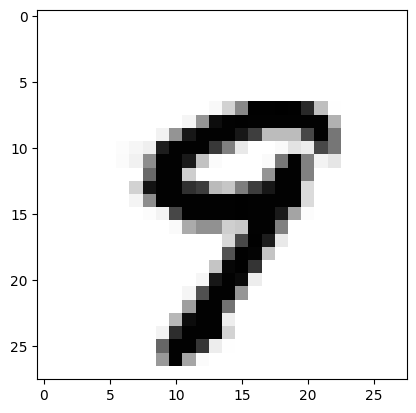

In [263]:
with torch.no_grad():
    x_test=test.test_data.view(-1,28*28).float().to(device)
    y_test=test.test_labels.to(device)

    
    predict=linear(x_test)
    correct=torch.argmax(predict,1)==y_test
    accuracy=correct.float().mean()
    print(accuracy.item())

    r=random.randint(0,len(test)-1)
    x_data=test.test_data[r:r+1].view(-1,28*28).float().to(device)
    y_data=test.test_labels[r:r+1].to(device)
    print(y_data.item())
    

    predict=linear(x_data)
    print(torch.argmax(predict,1).item())
    mp.imshow(test.test_data[r:r+1].view(28,28),cmap='Greys',interpolation='nearest')
    mp.show()